<a href="https://colab.research.google.com/github/Husainkhan24/Making_of_ANN/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

we are gonna build a deep learning model for bank Customer churn prediction using artificial neural network


Outline for this is

Collect the dataset from kaggle and setting up colab

importing libraries

observating dataset

scaling of dataset

Training a model using tensorlow




# Libraries Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Bank Customer Churn Prediction.csv")




*   Credit Sccore
*   Country
*   Gender
*   Age
*   Tenure
*   Balance
*   product number
*   creditcard
*   Active member 
*   estimate salary

these are the features on the basis of that we have to make an ANN model which predict weather customer will unsubscribe membership or not











In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# Observing Nature of Dataset 

In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Droping unnecessary Columns

In [ ]:
df.drop("customer_id",axis=1,inplace=True)

In [ ]:
df.isna().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

# Manual Encoding on Categorical Columns

In [ ]:
df["country"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [ ]:
df["country"]=df["country"].replace("France",0).replace("Germany",1).replace("Spain",2)

In [ ]:
df["country"].value_counts()

0    5014
1    2509
2    2477
Name: country, dtype: int64

In [ ]:
df["gender"].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [ ]:
df["gender"].replace("Male",1,inplace=True)
df["gender"].replace("Female",0,inplace=True)
df["gender"].value_counts()

1    5457
0    4543
Name: gender, dtype: int64

In [ ]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


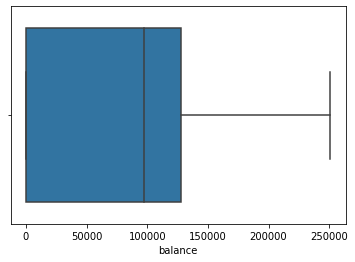

In [ ]:
sns.boxplot(df["balance"])

# Spliting Dataset into Traing and Testing

In [ ]:
x=df.drop("churn",axis=1)
y=df["churn"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

# Standardization of dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)


In [ ]:
xtest.shape

(2500, 10)

In [ ]:
xtrain.shape

(7500, 10)

# Building Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout



In [ ]:
model=Sequential()
model.add(Dense(units=10,activation="relu"))
model.add(Dense(units=8,activation="relu"))
model.add(Dense(units=6,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
var=model.fit(xtrain,ytrain,batch_size=7,validation_split=0.25,epochs=50)

Epoch 1/50
804/804 [==============================] - 4s 3ms/step - loss: 0.5017 - accuracy: 0.7872 - val_loss: 0.4547 - val_accuracy: 0.7984
Epoch 2/50
804/804 [==============================] - 3s 3ms/step - loss: 0.4372 - accuracy: 0.7975 - val_loss: 0.4266 - val_accuracy: 0.7984
Epoch 3/50
804/804 [==============================] - 3s 3ms/step - loss: 0.4138 - accuracy: 0.8023 - val_loss: 0.4057 - val_accuracy: 0.8117
Epoch 4/50
804/804 [==============================] - 3s 3ms/step - loss: 0.3951 - accuracy: 0.8315 - val_loss: 0.3875 - val_accuracy: 0.8432
Epoch 5/50
804/804 [==============================] - 3s 3ms/step - loss: 0.3782 - accuracy: 0.8439 - val_loss: 0.3714 - val_accuracy: 0.8501
Epoch 6/50
804/804 [==============================] - 2s 3ms/step - loss: 0.3707 - accuracy: 0.8501 - val_loss: 0.3659 - val_accuracy: 0.8507
Epoch 7/50
804/804 [==============================] - 3s 3ms/step - loss: 0.3657 - accuracy: 0.8510 - val_loss: 0.3633 - val_accuracy: 0.8432
Epoch 

In [ ]:
 var.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

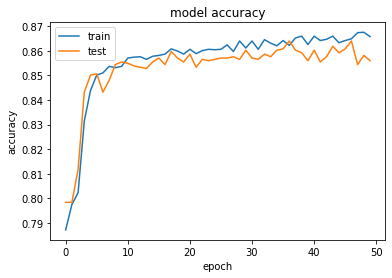

In [ ]:
plt.plot(var.history['accuracy'])
plt.plot(var.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluatin the Model

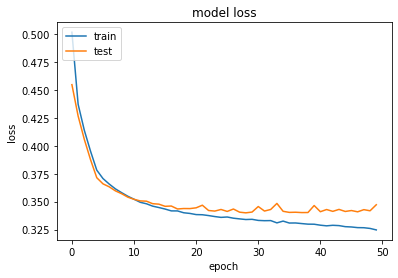

In [ ]:
plt.plot(var.history['loss'])
plt.plot(var.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
ypred=model.predict(xtest)
ypred=(ypred>=.05)
ypred

79/79 [==============================] - 0s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
cn=confusion_matrix(ytest,ypred)
cn

array([[ 528, 1452],
       [  11,  509]])

In [ ]:
acuracy=accuracy_score(ypred,ytest)
acuracy

0.4148

In [ ]:
# credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member       
#estimated_salary

test_val=np.array([[714,1,1,47,6,78678,2,0,1,786786.78]])
ypred=model.predict(test_val)
if ypred>=0.5:
  print("customer will unsubscribe ")
else:
  print("customer will continue subscription")


1/1 [==============================] - 0s 19ms/step
customer will unsubscribe 
